<a href="https://colab.research.google.com/github/SujayVivek/Cat-vs-Dog-ImageClassifier/blob/main/CatvsDogClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:10<00:00, 149MB/s]
100% 1.06G/1.06G [00:10<00:00, 112MB/s]


##Unzipping the file


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout


###By the concept of Generators- useful to process large amount of data provided by keras


In [ ]:
#generator
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
validation_data = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#Normalize
def process(image, label):
  image= tf.cast(image/255.,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_data=validation_data.map(process)

###Now the dataset is ready, we have to make our CNN model now


In [ ]:
#cnn model
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))



In [ ]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
history = model.fit(train_ds, epochs=10,validation_data=validation_data)

Epoch 1/10
625/625 [==============================] - 78s 116ms/step - loss: 1.3672 - accuracy: 0.5971 - val_loss: 0.6044 - val_accuracy: 0.6692
Epoch 2/10
625/625 [==============================] - 70s 111ms/step - loss: 0.5811 - accuracy: 0.6946 - val_loss: 0.5302 - val_accuracy: 0.7294
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5028 - accuracy: 0.7566 - val_loss: 0.4779 - val_accuracy: 0.7598
Epoch 4/10
625/625 [==============================] - 68s 107ms/step - loss: 0.4261 - accuracy: 0.8051 - val_loss: 0.5059 - val_accuracy: 0.7488
Epoch 5/10
625/625 [==============================] - 70s 111ms/step - loss: 0.3731 - accuracy: 0.8369 - val_loss: 0.4343 - val_accuracy: 0.8008
Epoch 6/10
625/625 [==============================] - 69s 109ms/step - loss: 0.2967 - accuracy: 0.8755 - val_loss: 0.6196 - val_accuracy: 0.7636
Epoch 7/10
625/625 [==============================] - 69s 110ms/step - loss: 0.2193 - accuracy: 0.9123 - val_loss: 0.5396 - val_ac

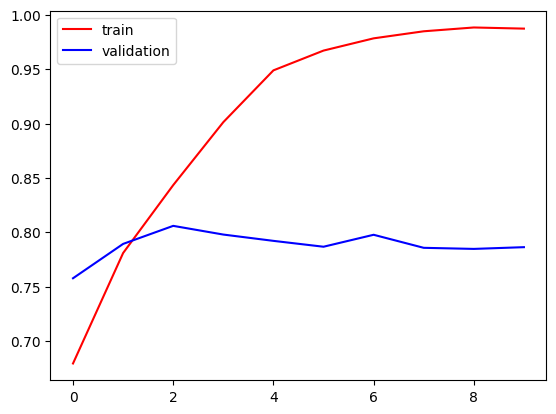

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

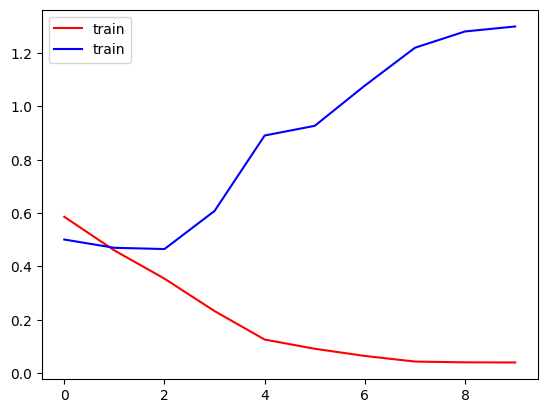

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='train')
plt.legend()
plt.show()

###Clearly there is overfitting; We can sort this by
#BatchNormalization
#Dropout


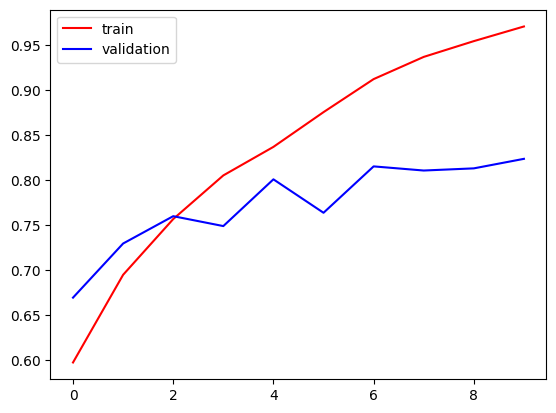

In [ ]:
#After Performing Both of these
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

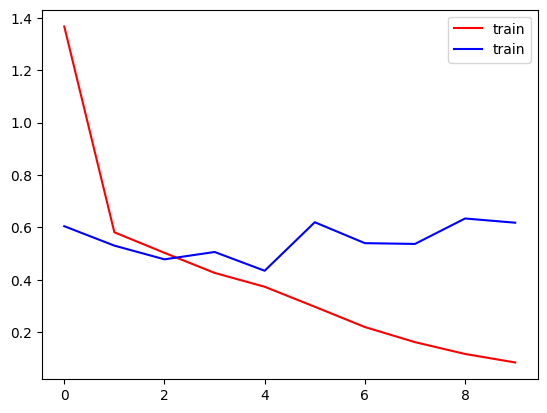

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='train')
plt.legend()
plt.show()

###Try Implementing Data Augmentation!